In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 读取txt文件数据，假设文件名为data.txt
data = np.loadtxt('sys_O_traj.txt', dtype={'names': ('residue', 'x', 'y', 'z'),
                                     'formats': ('U10', 'f4', 'f4', 'f4')})

# 提取x和z坐标
x = data['x']
z = data['z']

print(np.max(z))
print(np.min(z))

# # 绘制散点图
# plt.figure(figsize=(5.08/2.54, 5.08/2.54)) # 6.44
# plt.rcParams['font.family'] = 'Arial'  # 设置全局字体为 Arial
# ax = plt.gca()  # 设置图形边框线宽
# for spine in ax.spines.values():
#     spine.set_linewidth(1)  # 设置所有边框的线宽为 1

# plt.scatter(x, z, s=0.2, label='Nitrogen')

# # 添加标题和标签
# plt.title('Scatter Plot of x vs z')
# plt.xlabel('Position (nm)', fontsize=12, fontweight='semibold')
# plt.ylabel('Height (nm)', fontsize=12, fontweight='semibold')
# plt.grid(True)
# #plt.ylim(0, 70)

# # 显示网格和图例
# plt.grid(True)
# plt.legend()

# #plt.savefig('AZA_H_400_1000ps_time_avg.png', dpi=600, bbox_inches='tight')
# plt.show()



76.200005
-0.06


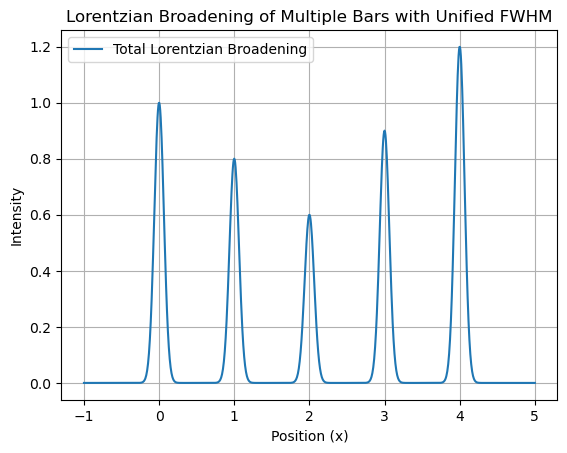

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def lorentzian(x, x0, FWHM, y0):
    """
    计算洛伦兹展宽函数
    :param x: 横坐标，频率或其他相关变量
    :param x0: 洛伦兹分布的中心位置
    :param FWHM: 半高全宽
    :param y0: 最大高度
    :return: 洛伦兹展宽函数的值
    """
    return y0 * (FWHM / 2) / (np.pi * ((x - x0)**2 + (FWHM / 2)**2))

def gaussian(x, x0, FWHM, y0):
    """
    计算高斯展宽函数
    :param x: 横坐标，频率或其他相关变量
    :param x0: 高斯分布的中心位置
    :param FWHM: 半高全宽
    :param y0: 最大高度
    :return: 高斯展宽函数的值
    """
    return y0 * np.exp(-4 * np.log(2) * (x - x0)**2 / FWHM**2)

if __name__ == "__main__":
    # 参数设置
    x_positions = np.array([0, 1, 2, 3, 4])  # 柱的位置
    y_heights = np.array([1, 0.8, 0.6, 0.9, 1.2])  # 每个柱的高度
    FWHM = 0.15  # 所有柱的统一半高全宽
    x = np.linspace(-1, 5, 1000)  # 横坐标范围，足够大以容纳所有柱
    
    # 初始化一个空的数组用于累加洛伦兹展宽结果
    y_total = np.zeros_like(x)
    
    # 对每个柱应用洛伦兹展宽，并累加结果
    for i in range(len(x_positions)):
        y_total += gaussian(x, x_positions[i], FWHM, y_heights[i])
    
    # 绘制图形
    plt.plot(x, y_total, label="Total Lorentzian Broadening")
    plt.title("Lorentzian Broadening of Multiple Bars with Unified FWHM")
    plt.xlabel('Position (x)')
    plt.ylabel('Intensity')
    plt.grid(True)
    plt.legend()
    plt.show()


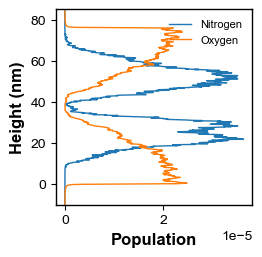

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 读取txt文件数据，假设文件名为data.txt
data = np.loadtxt('aza_N_traj.txt', dtype={'names': ('residue', 'x', 'y', 'z'),
                                     'formats': ('U10', 'f4', 'f4', 'f4')})

data2 = np.loadtxt('sys_O_traj.txt', dtype={'names': ('residue2', 'x2', 'y2', 'z2'),
                                     'formats': ('U10', 'f4', 'f4', 'f4')})

# 提取z坐标
position_N = data['z']# 柱的位置
position_O = data2['z2']
pop = 1  # 每个柱的高度
FWHM = 0.1  # 所有柱的统一半高全宽
x = np.linspace(-10, 85, 1000)  # 横坐标范围，足够大以容纳所有柱

# 初始化一个空的数组用于累加洛伦兹展宽结果
y_N = np.zeros_like(x)
for i in range(len(position_N)):
    y_N += lorentzian(x, position_N[i], FWHM, pop)

y_N /= (np.sum(y_N) * 95)
np.save('pop_N.npy', y_N)

y_O = np.zeros_like(x)
for i in range(len(position_O)):
    y_O += lorentzian(x, position_O[i], FWHM, pop)

y_O /= (np.sum(y_O) * 95)
np.save('pop_O.npy', y_O)

# 绘制散点图
plt.figure(figsize=(6.44/2.54, 6.44/2.54)) # 6.44
plt.rcParams['font.family'] = 'Arial'  # 设置全局字体为 Arial
ax = plt.gca()  # 设置图形边框线宽
for spine in ax.spines.values():
    spine.set_linewidth(1)  # 设置所有边框的线宽为 1

plt.plot(y_N, x, label="Nitrogen", linewidth=1)
plt.plot(y_O, x, label="Oxygen", linewidth=1)

# 添加标题和标签
plt.title('')
plt.xlabel('Population', fontsize=12, fontweight='semibold')
plt.ylabel('Height (nm)', fontsize=12, fontweight='semibold')
# plt.grid(True)
plt.ylim(-10, 85)
plt.legend(fontsize=8, loc='upper right', frameon=False)

plt.savefig('oxygen_nitrogen_population_lor.png', dpi=600, bbox_inches='tight')
plt.show()

